In [34]:
%%HTML
<h1 style="color: blue; text-align: center;"> Data Visualization </h1>

In [35]:
#importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#converting dataset into a dataframe
survey_df=pd.read_csv('survey_results_public.csv')

# computing number of rows
rows = len(survey_df.axes[0])
  
# computing number of columns
cols = len(survey_df.axes[1])

print("Number of rows are ",rows)

print("Number of columns are ",cols)
df_top=survey_df.head()
df_top


Number of rows are  83439
Number of columns are  48


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [36]:
j=survey_df.shape
j

(83439, 48)

In [37]:
survey_df.loc[j[0],:]=None

In [38]:
survey_df.shape

(83440, 48)

In [39]:
survey_df.iloc[-1]

ResponseId                       NaN
MainBranch                      None
Employment                      None
Country                         None
US_State                        None
UK_Country                      None
EdLevel                         None
Age1stCode                      None
LearnCode                       None
YearsCode                       None
YearsCodePro                    None
DevType                         None
OrgSize                         None
Currency                        None
CompTotal                        NaN
CompFreq                        None
LanguageHaveWorkedWith          None
LanguageWantToWorkWith          None
DatabaseHaveWorkedWith          None
DatabaseWantToWorkWith          None
PlatformHaveWorkedWith          None
PlatformWantToWorkWith          None
WebframeHaveWorkedWith          None
WebframeWantToWorkWith          None
MiscTechHaveWorkedWith          None
MiscTechWantToWorkWith          None
ToolsTechHaveWorkedWith         None
T

In [40]:
survey_df.dropna(how='all',inplace=True) #this will drop rows having all null
survey_df.dropna(axis=1,how='all',inplace=True) #this will drop columns having all null

In [41]:
survey_df.ndim

2

In [42]:
survey_df.isnull().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

In [43]:
selected_col = []
for value in survey_df.isnull().sum().items():
    if value[1]<=1000:
        print(value[0])
        selected_col.append(value[0])

ResponseId
MainBranch
Employment
Country
EdLevel
Age1stCode
LearnCode
OpSys
NEWStuck
NEWSOSites
SOAccount
NEWOtherComms


In [44]:
survey_df.dropna(axis='index',how='any',subset=selected_col,inplace=True)
survey_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1.0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2.0,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3.0,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,5.0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
5,6.0,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,Too long,Neither easy nor difficult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435.0,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436.0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437.0,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438.0,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [45]:
survey_df['CompTotal'].isnull().value_counts()

False    46648
True     34372
Name: CompTotal, dtype: int64

In [46]:
for col in survey_df:
    if survey_df[col].dtype == 'float64':
        survey_df[col].fillna(int(survey_df[col].mean()), inplace=True)
    elif survey_df[col].dtype == 'int64':
        survey_df[col].fillna(int(survey_df[col].mean()), inplace=True)
    elif survey_df[col].dtype == 'bool':
        survey_df[col].fillna(survey_df[col].mode()[0], inplace=True)
    else:
        survey_df[col].fillna(survey_df[col].mode()[0], inplace=True)

print(survey_df.isnull().sum())


ResponseId                      0
MainBranch                      0
Employment                      0
Country                         0
US_State                        0
UK_Country                      0
EdLevel                         0
Age1stCode                      0
LearnCode                       0
YearsCode                       0
YearsCodePro                    0
DevType                         0
OrgSize                         0
Currency                        0
CompTotal                       0
CompFreq                        0
LanguageHaveWorkedWith          0
LanguageWantToWorkWith          0
DatabaseHaveWorkedWith          0
DatabaseWantToWorkWith          0
PlatformHaveWorkedWith          0
PlatformWantToWorkWith          0
WebframeHaveWorkedWith          0
WebframeWantToWorkWith          0
MiscTechHaveWorkedWith          0
MiscTechWantToWorkWith          0
ToolsTechHaveWorkedWith         0
ToolsTechWantToWorkWith         0
NEWCollabToolsHaveWorkedWith    0
NEWCollabTools

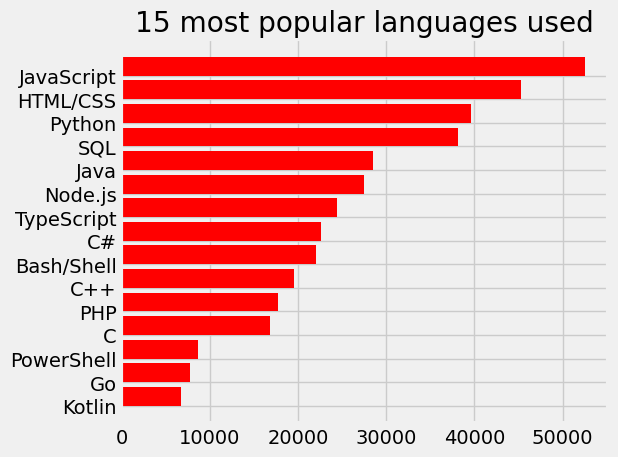

In [47]:
from collections import Counter
with open('survey_results_public.csv') as file:
    lang_counter=Counter()
    for pop_lan in survey_df['LanguageHaveWorkedWith']:
        lang_counter.update(pop_lan.split(';'))
    
languages=[]
popularity=[]

for item in lang_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
languages.reverse()
popularity.reverse()
plt.style.use('fivethirtyeight')
plt.barh(languages,popularity,height=0.8,align="edge",color='red')
plt.title("15 most popular languages used")
plt.xlabel="No of People"
plt.tight_layout()

In [69]:
unique_genders = survey_df['Gender'].unique()
print(unique_genders)

['Man' 'gender non-conforming' 'Woman'
 'Non-binary, genderqueer, or gender non-conforming'
 'Man;Or, in your own words:'
 'Woman;Non-binary, genderqueer, or gender non-conforming'
 'Man;Non-binary, genderqueer, or gender non-conforming'
 'Or, in your own words:' 'Man;Woman'
 'Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'
 'Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'
 'Woman;Or, in your own words:'
 'Man;Woman;Non-binary, genderqueer, or gender non-conforming'
 'Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'
 'Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'
 'Man;Woman;Or, in your own words:']


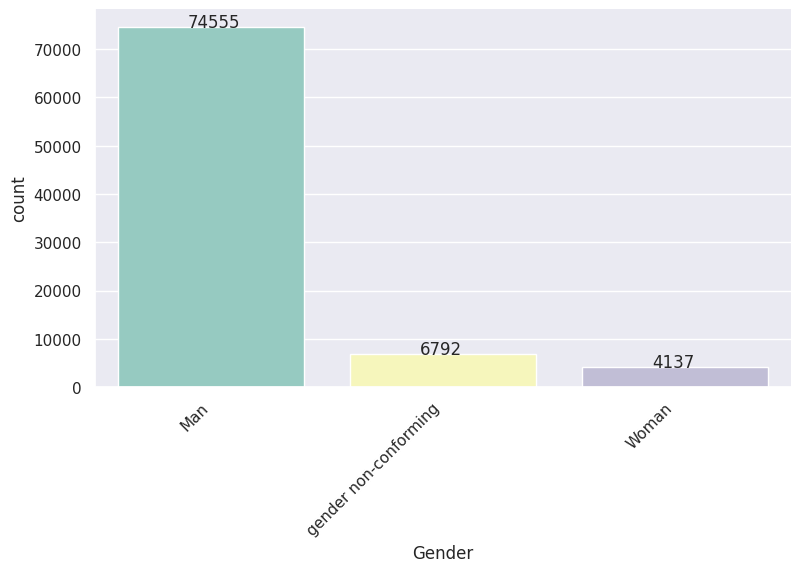

In [90]:
import seaborn as sns

# Split Gender column on commas and semicolons
Gen = survey_df['Gender'].str.split(',|;|:', expand=True)

# Replace non-Male and non-Female gender categories with "gender non-conforming"
Gen = Gen.apply(lambda x: x.str.strip().replace(to_replace=['Non-binary', 'genderqueer', 'Transgender', 
'Other', 'gender non-conforming', 'or', 'in your own words:', ' or gender non-conforming', 'Man;Or', 
'genderqueer, or gender non-conforming', 'Non-binary, genderqueer, or gender non-conforming',
'Woman;Non-binary, genderqueer, or gender non-conforming', 'Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 
'Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Woman;Or, in your own words:',
'Man;Woman;Non-binary, genderqueer, or gender non-conforming', 'Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
'Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 
'Man;Woman;Or, in your own words:','gender not conforming','or gender non-conforming','Or','in your own words',''], value='gender non-conforming'))

# Merge columns and convert to DataFrame
merged = Gen.stack().reset_index(drop=True).to_frame(name='Gender')

# Plot countplot using seaborn
ax = sns.countplot(x="Gender", data=merged, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.despine()
plt.subplots_adjust(bottom=0.25)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))
plt.show()


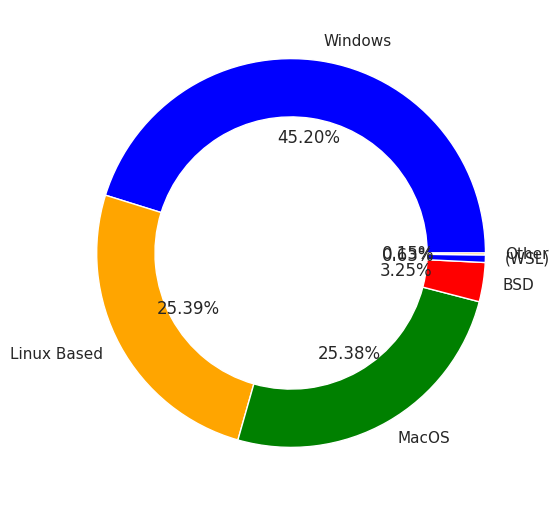

In [99]:
# print((survey_df['OpSys'].unique()))
import matplotlib.pyplot as plt
#define color palette to use
colors = ['blue', 'orange', 'green', 'red']
#create pie chart with increased gap
labels = ['Windows', 'Linux Based', 'MacOS', 'BSD','(WSL)','Other']
wedgeprops = {'width': 0.3, 'edgecolor': 'white'}
plt.pie(survey_df['OpSys'].value_counts(), labels=labels, colors=colors, autopct='%.2f%%', wedgeprops=wedgeprops)

plt.show()


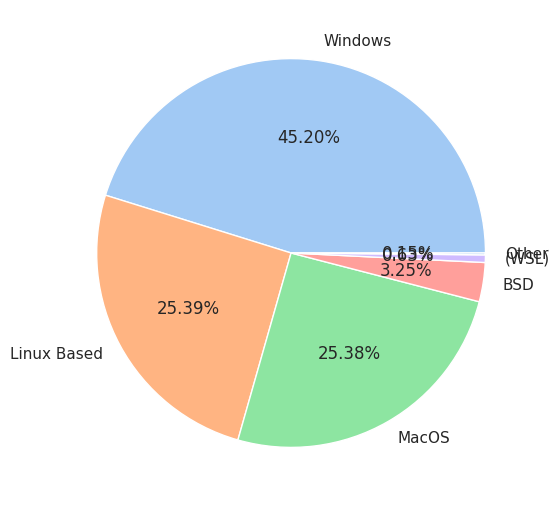

Windows                              36617
Linux-based                          20575
MacOS                                20559
Windows Subsystem for Linux (WSL)     2637
Other (please specify):                508
BSD                                    124
Name: OpSys, dtype: int64


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
labels = ['Windows', 'Linux Based', 'MacOS', 'BSD','(WSL)','Other']
plt.pie(survey_df['OpSys'].value_counts(),labels=labels,colors = colors, autopct='%.2f%%')
plt.show()
print(survey_df['OpSys'].value_counts())

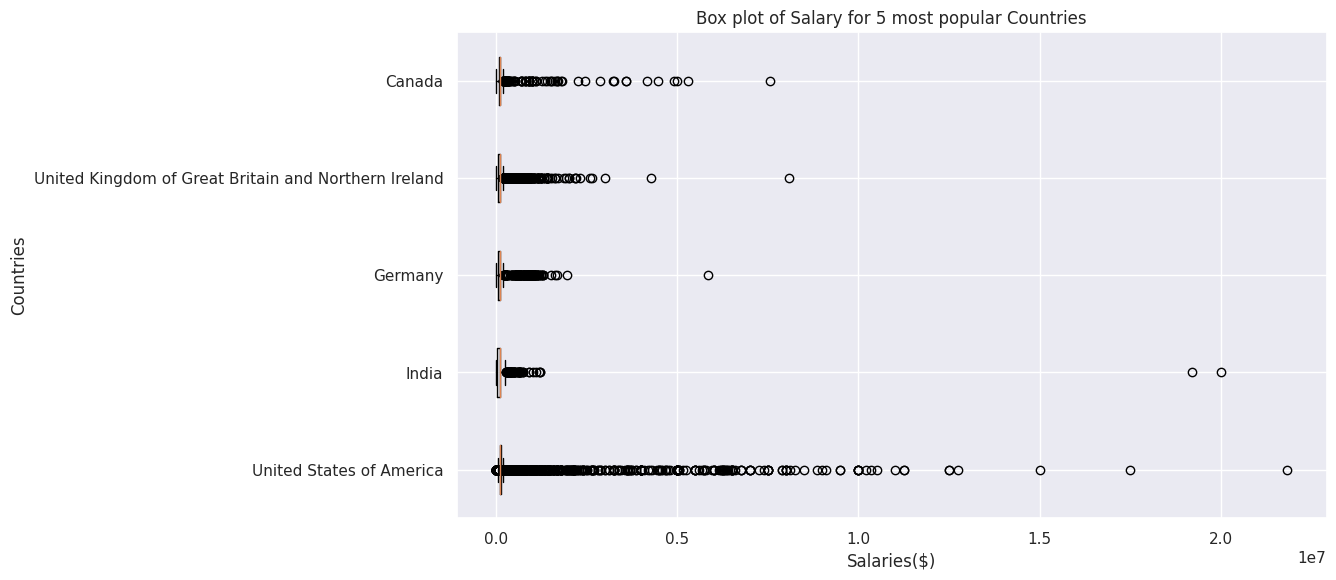

In [102]:
a = survey_df['Country'].value_counts()
ls = []
country = []
for value in a[:5].items():
    country.append(value[0])
    filt = survey_df["Country"]==value[0]
    ls.append(list(survey_df.loc[filt,"ConvertedCompYearly"]))

fig, ax = plt.subplots(figsize=(10, 6), sharey=True)
bp = ax.boxplot(ls, vert=False)
ax.set_yticklabels(country)
plt.title("Box plot of Salary for 5 most popular Countries")
ax.set_xlabel("Salaries($)")
ax.set_ylabel("Countries")
plt.show()
